In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import string

In [2]:
#Defining function to clean up dups from key field 'Make'
def func(x):
    punc = '''-!()[]{};:'",<>./?@#$%^&*~'''
    for ele in str(x):
        if ele in punc:
            x = str(x).replace(ele, "")
    x = str(x).title()
    x = x.replace(" Inc","")
    x = x.replace(" Corp","")
    x = x.replace(" Co","")
    x = x.replace("Airborne Windsports","Airborne_Windsports")
    x = x.replace("Airborne Windsport","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Ltd","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Air Borne Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Airbus Industrie","Airbus")
    x = x.replace("Airbuss","Airbus")
    x = x.replace("Boeingmpany","Boeing")
    x = x.replace("The Boeingmpany","Boeing")
    x = x.replace("The Boeing","Boeing")
    x = x.replace("Brantley","Brantly")
    x = x.replace("Mcdonnell Douglasoration","Mcdonnell_Douglas")
    x = x.replace("Mcdonald Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell-Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Douglas Aircraft","Mcdonnell_Douglas")
    x = x.replace("Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Mcdonnell_Douglas","Mcdonnell_Douglas")
    x = x.replace("Saabscania","Saab_Scania")
    x = x.replace("Saab-Scania Ab Saab","Saab_Scania")
    x = x.replace("Saabscania Ab Saab","Saab_Scania")
    x = x.replace("Saab-Scania","Saab_Scania")
    x = x.replace("Saab_Scania Ab Saab","Saab_Scania")
    x = x.replace("Waco","Waco_Classic_Aircraft")
    x = x.replace("Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco_Classic_Aircraft Waco_Classic_Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Schweitzer","Schweizer")
    x = x.replace("Schewizer","Schweizer")
    x = x.replace("Pm Aviation Ltd","Pm Aviation")
    x = x.replace("Schleicher Alexander Gmbh ","Schleicher Alexander Gmbh")
       
    return x

In [3]:
#Cleaning up dups from key fields and downstream dependency & imputing weather condition field for further analysis
df = pd.read_csv('AviationDataCleaned.csv',low_memory=False)
df['Make'] = df['Make'].apply(func)
df['Model'] = df['Model'].apply(func)
df['Make and Model']=df['Make and Model']= df['Make']+"-"+df['Model'] 
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK').apply(lambda x: str(x).upper())
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [4]:
#inspecting the Make column to make sure it is cleaned up appropriately
make_list=list(df['Make'].unique())
make_list.sort()
print(make_list)

['1200', '177Mf Llc', '2000 Mccoy', '2021Fx3 Llc', '3Xtrim', '737', 'A Schleicher Gmbh ', 'Aaa Aircraft Leasing', 'Aaa Aircraft Llc', 'Ab Sportine Aviacija', 'Abc', 'Ac Mfg  Devt', 'Adams', 'Adams Balloon', 'Adams Balloons Llc', 'Adams Dennis Allen', 'Advanced Acft', 'Advanced Aviation', 'Advanced Technology', 'Adventura', 'Aerial Productions Intl', 'Aermacchi', 'Aero Adventure', 'Aero At Sp Zoo', 'Aero Bristell', 'Aero Design Eleven', 'Aero Eli Servizi', 'Aero Falcon Intl', 'Aero Mercantil Sa', 'Aero Sp Z O O', 'Aero Sp Z O O Gobosh', 'Aero Tek', 'Aero Vodochody', 'Aero Vodochody Aero Works', 'Aero Works', 'Aerodyne', 'Aerofab', 'Aerolite', 'Aerommander', 'Aeromot', 'Aeronca', 'Aeronca Aircraftoration', 'Aeronca Champ', 'Aeronca Champion', 'Aeroncabubeck', 'Aeroncabubeck Irving', 'Aeroprakt', 'Aeroprakt Manufacturing Sp Zoo', 'Aeropro Cz', 'Aeropro Cz S R O', 'Aeros', 'Aeros Ltd', 'Aeros Ltdskyranger Aircraft', 'Aerospace', 'Aerospace Tech Of Australia', 'Aerospatiale', 'Aerospatiale 

In [5]:
#coming up with makes with at least 10 records to consider as major makes to narrow down data set
major_index = df['Make'].value_counts(ascending=False)>10
major_makes_dict={'makes':list(major_index.index),'bools':list(major_index.values)}
major_makes = pd.DataFrame(major_makes_dict)
major_makes_list=major_makes.loc[major_makes['bools']==True,'makes']
df_major=df[df['Make'].isin(major_makes_list)]

In [6]:
#inspecting the size of narrowed down data set
df[df['Make'].isin(major_makes_list)].shape

(76204, 27)

In [7]:
#Coming up with makes that are considered safest based on the safety metric aka with the highest average percentage of passengers with no or minor injury
#Then Slicing the dataset with the these makes and a known weather condition for further analysis  
df_major_make_mean = df_major.groupby('Make').mean().sort_values(by=['Minor/NonInj_Percentage'],axis=0,ascending=False)
safest_makes=list(df_major_make_mean.head(15).index)
df_safest = df[df['Make'].isin(safest_makes)]

df_safest_makes=df_safest[df_safest['Weather.Condition'].isin(['IMC','VMC'])]
df_safest_makes[['Make']]=df_safest_makes[['Make']].astype('category')
df_safest_makes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 49 to 79021
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               2512 non-null   int64   
 1   Investigation.Type       2512 non-null   object  
 2   Event.Date               2512 non-null   object  
 3   Location                 2509 non-null   object  
 4   Country                  2506 non-null   object  
 5   Injury.Severity          2512 non-null   object  
 6   Aircraft.damage          1848 non-null   object  
 7   Aircraft.Category        826 non-null    object  
 8   Make                     2512 non-null   category
 9   Model                    2512 non-null   object  
 10  Amateur.Built            2507 non-null   object  
 11  Number.of.Engines        2346 non-null   float64 
 12  Engine.Type              2334 non-null   object  
 13  Schedule                 1639 non-null   object  
 14  Total.

C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
#just inspecting the stats of these makes 
df_major_make_mean.head(15)

,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
Make,,,,,,,,,,,
American Legend Aircraft,77049.526316,1.000000,0.000000,0.052632,0.105263,1.263158,2015.210526,1.421053,0.000000,5.263158,94.736842
Saab_Scania,46502.022727,1.950000,0.545455,0.204545,0.250000,19.954545,1999.159091,20.954545,4.734848,1.446081,93.819071
Howard Aircraft,39502.062500,1.062500,0.062500,0.000000,0.000000,2.187500,1997.375000,2.250000,6.250000,0.000000,93.750000
Bombardier,69250.781022,1.983051,1.328467,0.430657,0.240876,43.956204,2010.722628,45.956204,4.364964,1.988253,93.646784
Snow,29501.225806,1.000000,0.096774,0.000000,0.064516,0.935484,1992.225806,1.096774,6.451613,0.000000,93.548387
Airbus,64189.000000,1.967480,7.933333,1.019048,1.603175,134.206349,2008.434921,144.761905,6.912658,1.619104,91.468238
Boeing,49914.301913,2.181874,4.065796,1.012599,1.077928,96.953803,2001.714886,103.110126,5.483941,3.318763,91.197297
Waco_Classic_Aircraft,47021.050279,1.000000,0.089385,0.111732,0.324022,1.541899,2000.106145,2.067039,3.724395,5.772812,90.502793
Ultramagic,75010.571429,0.285714,0.000000,0.714286,0.857143,8.142857,2013.928571,9.714286,0.000000,10.454545,89.545455


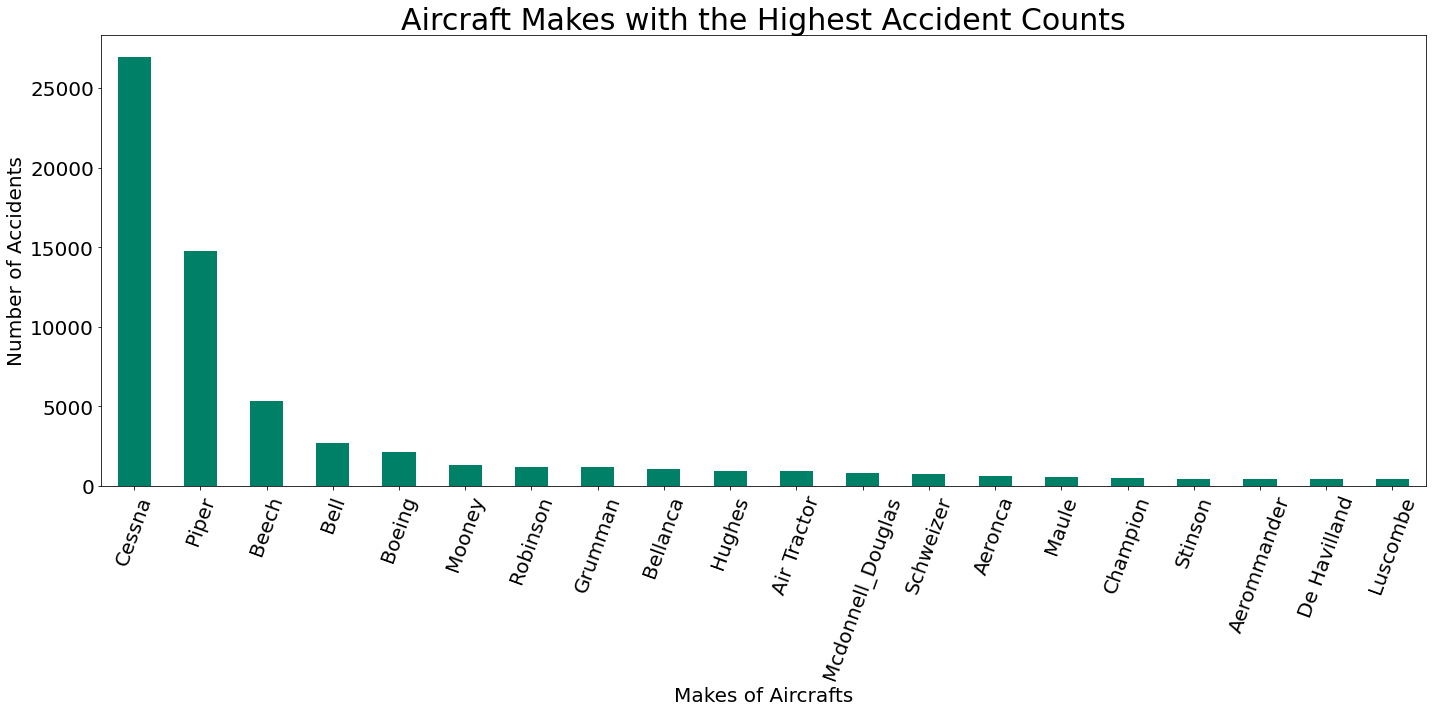

In [9]:
#plotting the top accident counts by aircraft make to make sure the recommended safest makes are not prone to accidents 
fig, ax = plt.subplots(figsize = (20,10))
df_major['Make'].value_counts().head(20).plot.bar(ax=ax,colormap='summer')
ax.set_title('Aircraft Makes with the Highest Accident Counts', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('Number of Accidents', fontsize = 20)
ax.tick_params(axis = 'x', rotation =70, labelsize=20)
ax.tick_params(axis = 'y', labelsize=20)
plt.tight_layout()
plt.show()

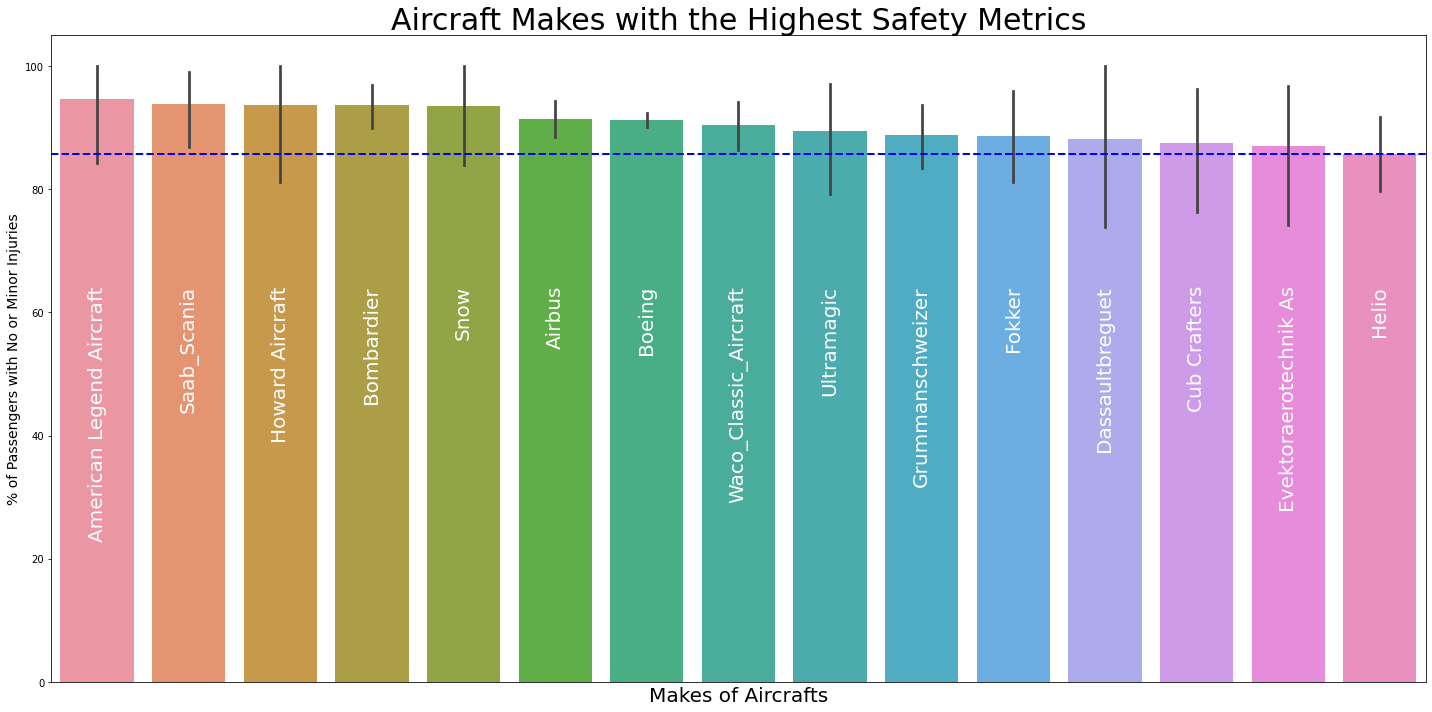

In [10]:
#plot to demonstrate the safest makes and their safety metrics
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='Make',y='Minor/NonInj_Percentage',data=df_safest,order=list(safest_makes))
ax.set_title('Aircraft Makes with the Highest Safety Metrics', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('% of Passengers with No or Minor Injuries', fontsize = 14)
ax.tick_params(axis = 'x', rotation = 90, pad = -400, labelsize=20,colors='white')
ax.axhline(y=85.797161, c ='b', linewidth = 2, linestyle = '--')
plt.tight_layout()
plt.show()


In [11]:
#ax.annotate('~85.8%', xy = ['Helio',85.797161], xytext = ['Helio',100],fontsize = 12, c = 'b', arrowprops = dict(arrowstyle='->', color='blue', linewidth=2))


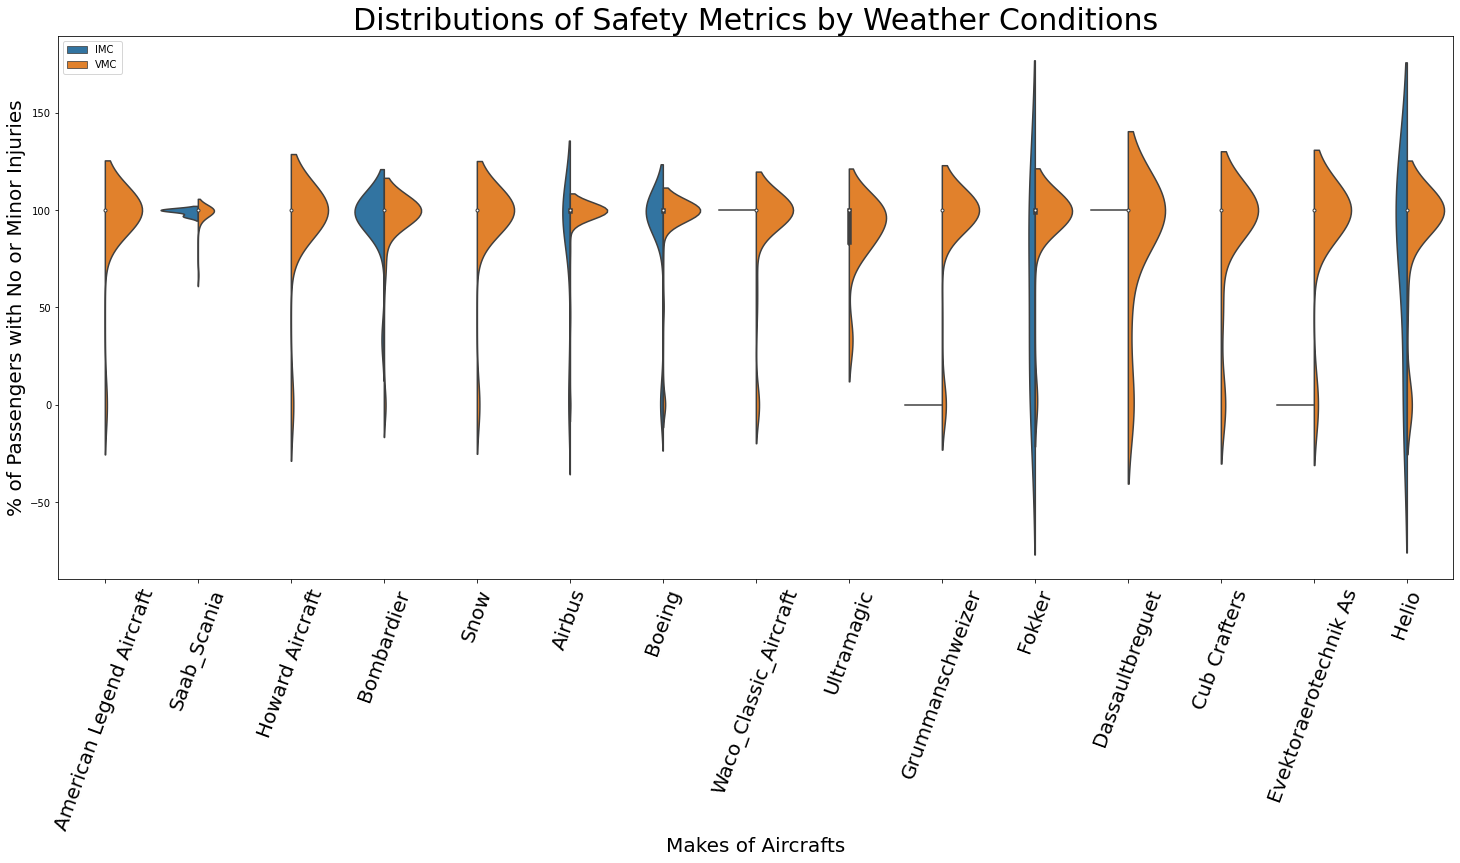

In [12]:
#plot to analyze the distribution of safety metric for the safest makes based on weather condition 
fig, ax = plt.subplots(figsize = (25,10))
sns.violinplot(x='Make',y='Minor/NonInj_Percentage',data = df_safest_makes,order=list(safest_makes),hue='Weather.Condition',split = True)
ax.set_title('Distributions of Safety Metrics by Weather Conditions', fontsize = 30 )
ax.set_xlabel('Makes of Aircrafts', fontsize = 20)
ax.set_ylabel('% of Passengers with No or Minor Injuries', fontsize = 20)
ax.tick_params(axis = 'x', rotation = 70, labelsize=20,colors='black')
ax.legend(loc = 'upper left')
plt.show()

In [13]:
#Used to inpsect makes with no IMC weather hue distributions to confirm they are not suitable for recommendation. 
#These are generally small makes that are more impacted by adverse weather conditions and therefore less versatile and profitable
df[df['Make']=='American Legend Aircraft']['Total_passengers'].describe()

count    19.000000
mean      1.421053
std       0.507257
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Total_passengers, dtype: float64

In [14]:
# coming up with the list of recommended makes that are more weather resilient and predictable in safety metric (less dispersed in distribution)
recommended_makes=['Bombardier','Saab_Scania','Boeing']
#slicing the data set with recommeded makes for specific model recommendations
len(df[df['Make'].isin(recommended_makes)])

2324

In [15]:
#Coming up with specific recommended models with 100% minor or no injury rates that holds at least 10 passengers
df_subset_makenmodel_mean = df[df['Make'].isin(recommended_makes)].groupby('Make and Model').mean()
df_recommended_makemodels=df_subset_makenmodel_mean[df_subset_makenmodel_mean['Minor/NonInj_Percentage']==100]
df_recommended_makenmodels=df_recommended_makemodels[df_recommended_makemodels['Total_passengers']>10]
recommended_makenmodels=list(df_recommended_makenmodels.index)
recommended_makenmodels

['Boeing-707123B',
 'Boeing-707355C',
 'Boeing-717 200',
 'Boeing-717231',
 'Boeing-720025',
 'Boeing-727023',
 'Boeing-727200A',
 'Boeing-727200B',
 'Boeing-72721',
 'Boeing-727214A',
 'Boeing-72722',
 'Boeing-727223B',
 'Boeing-72722C',
 'Boeing-72723',
 'Boeing-727231A',
 'Boeing-727233',
 'Boeing-727247',
 'Boeing-72725',
 'Boeing-727254',
 'Boeing-727257',
 'Boeing-727276',
 'Boeing-727290',
 'Boeing-7272M7',
 'Boeing-7272Q8',
 'Boeing-72731',
 'Boeing-72731H',
 'Boeing-72735',
 'Boeing-72751',
 'Boeing-72790C',
 'Boeing-737  3L9',
 'Boeing-737  4D7',
 'Boeing-737  53C',
 'Boeing-737  6Ct',
 'Boeing-737  800',
 'Boeing-737  8As',
 'Boeing-737  8K2',
 'Boeing-737  932Er',
 'Boeing-737 3H4',
 'Boeing-737 500',
 'Boeing-737 724',
 'Boeing-737 76N',
 'Boeing-737 76Q',
 'Boeing-737 7L9',
 'Boeing-737 800',
 'Boeing-737 832',
 'Boeing-737 924',
 'Boeing-737130',
 'Boeing-737200A',
 'Boeing-737200C',
 'Boeing-737200Rs',
 'Boeing-737205',
 'Boeing-737209',
 'Boeing-737217',
 'Boeing-73724

In [16]:
#Creating dataset filtered for recommended makes and models
df_recommended_makes=df[df['Make'].isin(recommended_makes)]
df_recommended_makenmodels=df[df['Make and Model'].isin(recommended_makenmodels)]

In [17]:
#Outputting recommedations as csvs
df_recommended_makenmodels.to_csv('AviationDataCleaned_RecommendedModel.csv')
df_recommended_makes.to_csv('AviationDataCleaned_RecommendedMakes.csv')